    Ben Christensen
    Math 439
    February 21, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
%matplotlib inline

# Total Variation

## Problem 1

Construct a numerical solution of (20.4) using the conditions $y(−1) = 1$, $y(1) = 7$. Use 20 $x$ steps, 250 time steps, and a final time of .2.

Most numerical schemes have a stability condition that must be satisfied. Our discretization requires that $\frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}$. Check that this condition is satisfied.

Let the straight line connecting the endpoints serve as an initial guess, $u$. Iterate through
the time steps, updating $u$ according to `u+=dt*u_t` until the norm of the difference between successive iterations is less than $10^{−5}$. Keep in mind
the endpoints should not update.
Plot the solution that minimizes (20.4). It should match figure 20.1.


In [2]:
#Number of x points
N = 21
#Number of time points
T = 251
#Formula for the initial guess
g = lambda x: 3*x+4
x_points = np.linspace(-1, 1, N)
times = np.linspace(0, .2, T)
initial_guess = g(x_points)
#Calculate time/x steps given number of steps
delta_t, delta_x = (times[1]-times[0]), (x_points[1]-x_points[0])
print("Stability condition satisfied:", delta_t/delta_x**2 <=.5)

Stability condition satisfied: True


In [3]:
#Generate empty U matrix
U = np.zeros((T, N))
U[:,0], U[:,-1] = 1, 7
U[0] = g(x_points)
tol = 10e-5
for i in range(1, T):
    #Update U according to u+=dt*u_t
    U[i, 1:-1] = U[i-1, 1:-1] + delta_t*(-1 - ((U[i-1, 2:]-U[i-1, :-2])/(2*delta_x))**2 + U[i-1, 1:-1]*(U[i-1, 2:] - 2*U[i-1, 1:-1] + U[i-1, :-2])/(delta_x**2))
    if la.norm(U[i] - U[i-1]) < tol:
        print('t =', i)
        break

In [4]:
print(U[-1])
print(initial_guess)

[1.         1.10135246 1.2207954  1.3579489  1.51250336 1.68427336
 1.87324606 2.07962297 2.30385529 2.54667343 2.80911201 3.09253169
 3.39863906 3.72950605 4.08758996 4.4757553  4.89729833 5.35597537
 5.85603552 6.40225877 7.        ]
[1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7 4.  4.3 4.6 4.9 5.2 5.5 5.8 6.1
 6.4 6.7 7. ]


In [5]:
(T-1)*delta_t

0.2

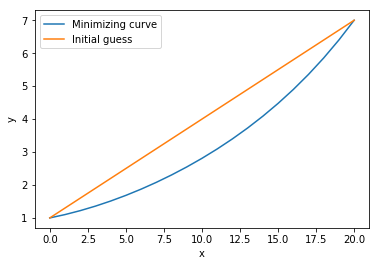

In [6]:
#Plot the minimizing curve against the initial guess
plt.plot(U[-1], label = "Minimizing curve")
plt.plot(initial_guess, label="Initial guess")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 2

Let u be the grayscale image balloons_bw.jpg; remember to scale it when importing. 

Using $\Delta t = 1e−3$, $\lambda = 40$, $\Delta x = 1$, and $\Delta y = 1$, implement the numerical scheme mentioned above to obtain a denoised solution $u$. (So $Omega = [0, n_x] \times [0, n_y]$, where $n_x$ and $n_y$ represent the number of pixels in the x and y dimensions, respectively.) Take 250 steps in time. Compare your results with Figure 20.3.
Hint: Use the function `np.roll` to compute the spatial derivatives. For example, the second derivative can be approximated at interior grid points using:

`u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)`

In [7]:
from imageio import imread

imagename = 'balloons_resized_bw.jpg'
changed_pixels=40000
# Read the image file imagename into an array of numbers, IM
# Multiply by 1. / 255 to change the values so that they are floating point
# numbers ranging from 0 to 1.
IM = imread(imagename, as_gray=True) * (1. / 255)
IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_,y_ = np.random.randint(1,IM_x-1), np.random.randint(1,IM_y-1)
    val = .1*np.random.randn() + .5
    IM[x_,y_] = max( min(val,1.), 0.)
     

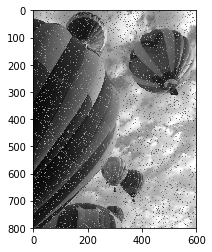

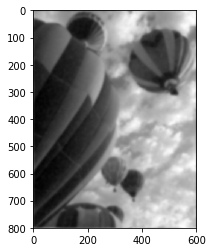

In [8]:
#Set initial conditions
dt = 1e-3
lambda_ = 40
delta_x = 1
delta_y = 1
T = 251
time_points = np.linspace(0, dt*(T-1), T)
f = IM
#Copy f so we don't change it as we update u
u = np.copy(f)
#Note: delta_u = u_xx + u_yy
for i in range(1, T):
    u_xx = np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)
    u_yy = np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)
    u_t = -(u - f - lambda_*(u_xx + u_yy))
    u += dt*u_t
#Show the new image along side its original
plt.imshow(f, cmap='gray')
plt.show()
plt.imshow(u, cmap='gray')
plt.show()


## Problem 3

Using $\Delta t = 1e−3$, $\lambda = 1$, $\Delta x = 1$, and $\Delta y = 1$, implement the numerical scheme mentioned above to obtain a solution $u$. Take 200 steps in time. Compare your results with
Figure 20.3. How small should $\epsilon$ be?

Hint: To compute the spatial derivatives, consider the following:

`u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2`

`u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)`

`u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.`

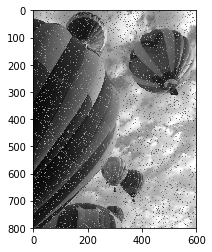

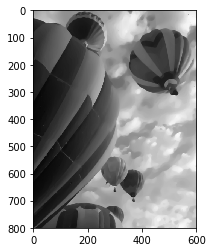

In [12]:
#Set initial conditions
dt = 1e-3
epsilon = 1e-6
lambda_ = 1.
dx, dy = 1, 1
T = 201
time_points = np.linspace(0, dt*(T-1), T)
f = IM
u = np.copy(f)
#Update u with total variations
for i in range(1, T):
    u_x = (np.roll(u,-1,axis=1) -  np.roll(u,1,axis=1))/2
    u_y = (np.roll(u,-1,axis=0) -  np.roll(u,1,axis=0))/2
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2
    u_t = -lambda_*(u-f) + (u_xx*u_y**2 + u_yy*u_x**2 - 2*u_x*u_y*u_xy) / \
                           (epsilon + u_x**2 + u_y**2)**(3/2)
        
    u += dt*u_t
#Show the new image alongside its original
plt.imshow(f, cmap='gray')
plt.show()
plt.imshow(u, cmap='gray')
plt.show()